In [1]:
import random
import matplotlib.pyplot as plt
import time
import numpy as np

In [6]:
# Function for obtaining the next Action (dices to throw) based on the Politics
def getNextAction(state, Q, epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.randint(1, maxDices)  # Random exploration
    else:
        return Q[state][1]  # Exploiting the current best action

# Function that will update the Q matrix after an Action and observation of the new game State along with the Reward
def updateQ(Q, state, action, reward, newState, alpha, gamma, max_Q2):
    if reward >= max_Q[state][2]:
        max_Q[state] = [state, action, reward]
        Q[state][1] = round(Q[state][1] + (alpha * (reward + (gamma * max_Q2[state][1]) - Q[state][1]))) # Bellman Equation

    return Q

# Function which simulates a game round with the current Action or number of dices thrown
def roundSim(Q, max_Q):

    pointSum = 0
    action = getNextAction(0, Q, epsilon)

    for dice in range(action):
        diceResult = random.randint(1, maxDiceFace)
        pointSum += diceResult

    if pointSum != targetSum:
        reward = -(abs(targetSum-pointSum))
    else:
        reward = pointSum


    newState = 0

    Q = updateQ(Q, 0, action, reward, newState, alpha, gamma, max_Q)

    return Q



[[0, 100]]
[[0, 0, -550]]


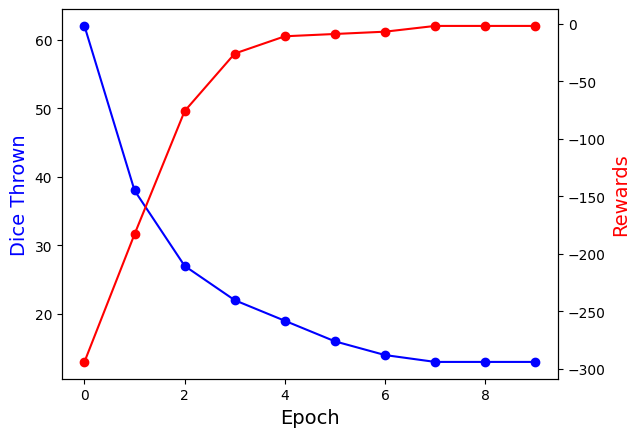

Optimal number of dice to throw 14 found in 10 Epochs


In [7]:
# Define the game variables
targetSum = 50
maxDices = 100
maxDiceFace = 6

# We define and initial matrix Q (Politics)
Q = [[0, maxDices]] # matrix Q[State][Action]
print(Q)
max_Q = [[0, 0, -abs(targetSum - (maxDiceFace * maxDices))]] # We set the starting Action as the worst posible strategy for a more clear learning curve
print(max_Q)

# Define the learning parameters
alpha = 0.1  # rate of learning
gamma = 0.1  # discount factor
epsilon = 0.1  # porbability of exploring random strategies

# Train the model during various epochs until it converges into an optimal strateg

currentTrainignRound = 0
maxEpochs = 10
optimalQs = []
optimalRs = []
timePerEpoch = []

start_time = time.time()

# This will define our stop criteria, in this case we'll use either it exausted the epochs to find the answer or it did find what we consider and optimal answer
while currentTrainignRound < maxEpochs and max_Q[0][2] != targetSum:
    Q = roundSim(Q, max_Q)
    optimalQs.append(Q[0][1])
    optimalRs.append(max_Q[0][2])
    currentTrainignRound += 1
    timePerEpoch.append(time.time() - start_time)

fig,ax = plt.subplots()
ax.plot(optimalQs, color="blue", marker="o")
ax.set_xlabel("Epoch", fontsize = 14)
ax.set_ylabel("Dice Thrown", color="blue", fontsize=14)

ax2=ax.twinx()
ax2.plot(optimalRs, color="red",marker="o")
ax2.set_ylabel("Rewards",color="red",fontsize=14)
plt.show()


print(f'Optimal number of dice to throw {max_Q[0][1]} found in {currentTrainignRound} Epochs')
